/home/hung/testbuild/curveball-im/networkit/graphio.py
Finished randomizing the samples...


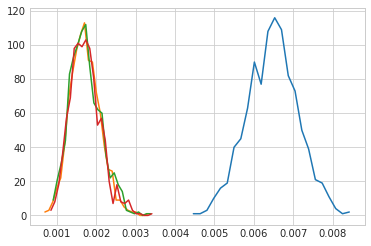

In [29]:
from networkit import *
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab as p

print(graphio.__file__)

# Get the graphs
gPower = graphio.readGraph("power.gml", Format.GML, directed=True)
for u, v in gPower.edges():
    gPower.addEdge(v, u)
    
sample_size = 1000
    
# Generate 1000 Samples
gPower_samples = [copy.deepcopy(gPower) for i in range(sample_size)]

# Randomize for 0.5*m swaps
gPower_1 = []
swapGen = curveball.UniformTradeGenerator(math.ceil(0.5 * gPower.numberOfEdges()), gPower.numberOfEdges())
for i in range(sample_size):
    esmc = curveball.EdgeSwitchingMarkovChainRandomization(gPower)
    # Abuse UniformTradeGenerator
    esmc.run(swapGen.generate())
    gPower_1.append(esmc.getGraph())
    
# Randomize for another 2*m swaps (2.5*m now)
gPower_2 = []
swapGen = curveball.UniformTradeGenerator(2 * gPower.numberOfEdges(), gPower.numberOfEdges())
for g in gPower_1:
    esmc = curveball.EdgeSwitchingMarkovChainRandomization(g)
    # Abuse UniformTradeGenerator
    esmc.run(swapGen.generate())
    gPower_2.append(esmc.getGraph())
    
# Randomize for another 2.5*m swaps (5*m now)
gPower_3 = []
swapGen = curveball.UniformTradeGenerator(math.ceil(2.5 * gPower.numberOfEdges()), gPower.numberOfEdges())
for g in gPower_2:
    esmc = curveball.EdgeSwitchingMarkovChainRandomization(g)
    # Abuse UniformTradeGenerator
    esmc.run(swapGen.generate())
    gPower_3.append(esmc.getGraph())
    
# Randomize for another 2.5*m swaps (7.5*m now)
gPower_4 = []
swapGen = curveball.UniformTradeGenerator(math.ceil(2.5 * gPower.numberOfEdges()), gPower.numberOfEdges())
for g in gPower_3:
    esmc = curveball.EdgeSwitchingMarkovChainRandomization(g)
    # Abuse UniformTradeGenerator
    esmc.run(swapGen.generate())
    gPower_4.append(esmc.getGraph())

print("Finished randomizing the samples...")

d_Power1 = np.array([np.average(centrality.LocalClusteringCoefficient(g, True).run().scores()) for g in gPower_1])
y, binEdges = np.histogram(d_Power1, bins='fd')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters, y, '-')

d_Power2 = np.array([np.average(centrality.LocalClusteringCoefficient(g, True).run().scores()) for g in gPower_2])
y, binEdges = np.histogram(d_Power2, bins='fd')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters, y, '-')

d_Power3 = np.array([np.average(centrality.LocalClusteringCoefficient(g, True).run().scores()) for g in gPower_3])
y, binEdges = np.histogram(d_Power3, bins='fd')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters, y, '-')

d_Power4 = np.array([np.average(centrality.LocalClusteringCoefficient(g, True).run().scores()) for g in gPower_4])
y, binEdges = np.histogram(d_Power4, bins='fd')
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.plot(bincenters, y, '-')
p.show()